# **Assessment 2**

For our second assessment, we will be looking at sequential weather data. The data contains a number of relevant weather variables, recorded daily for a European city during a period of four decades.

However, this dataset has been corrupted, and some of the daily measurements are now missing. The goal of this assessment is to develop a neural network architecture that can recover the missing measurements!

<br>

---

<br>

The dataset has been saved as `.csv` files and has been separated into a `training_set/` folder and a `test_set.csv` file. The `training_set/` contains data for three of the four decades, separated in one individual file per decade:

- `training_set_0.csv` contains corrupted data for the first decade; `training_set_0_nogaps.csv` contains the same data before it was corrupted.
- `training_set_1.csv` contains corrupted data for the second decade; `training_set_1_nogaps.csv` contains the same data before it was corrupted.
- `training_set_2.csv` contains corrupted data for the third decade; `training_set_2_nogaps.csv` contains the same data before it was corrupted.

The `test_set.csv` file contains the remaining decade; this data is corrupted and contains gaps, but we have lost access to the data before corruption.

The architecture that you design in this assessment should use the data contained inside the `training_set` in order to recover the missing information in the data in `test_set.csv`. Note that decades `0`, `1`, and `2` are not necessarily consecutive.

Inside each of the `.csv` files, you will find the following columns:

- `date`
- `cloud_cover`
- `sunshine`
- `global_radiation`
- `max_temp`
- `mean_temp`
- `min_temp`
- `precipitation`
- `pressure`

<br>

All answers to the assessment should be contained within the structure below, but you are free to add new code and text cells as required to your answers. Read the text for each question and follow the instructions carefully. Answers that do not follow this structure will not be marked. **Do NOT change the name of this file.**

Please, **make sure to execute all your cells and save the result of the execution**. We will only mark cells that have been executed and will not execute any cells ourselves.

<br>

---

<br>

<br><br>

## **Question 1**  (25%)

Load the training and test datasets. Then, use the space below to present the following set of figures:

1. Using line plots, show the different variables in each dataset, both before and after corruption. Choose a single decade to plot, and plot the first 365 days of data. Plot the time series for each variable in an independent axis window. Make sure the axis windows are sized appropriately so that trends and corruption in the variables can be easily observed.
2. Plot a histogram for each variable in each dataset, across all decades, both before and after corruption.

<br>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **1) Line plots for decade 0**

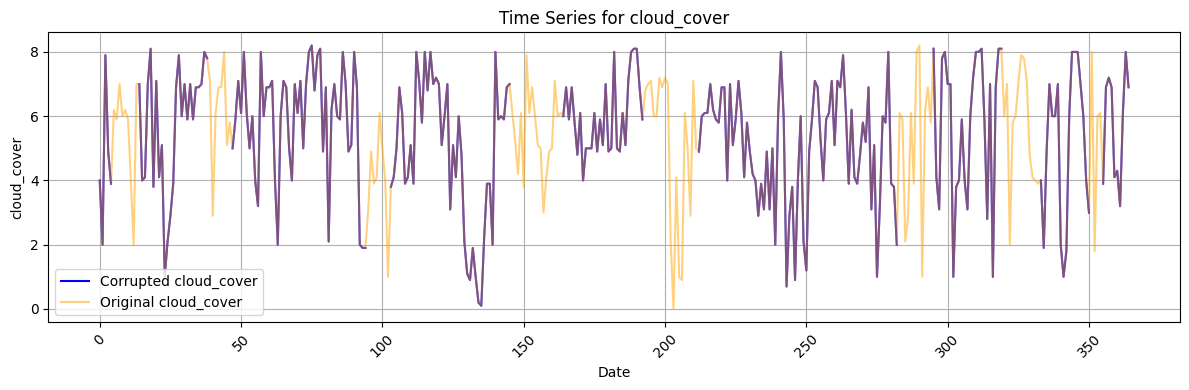

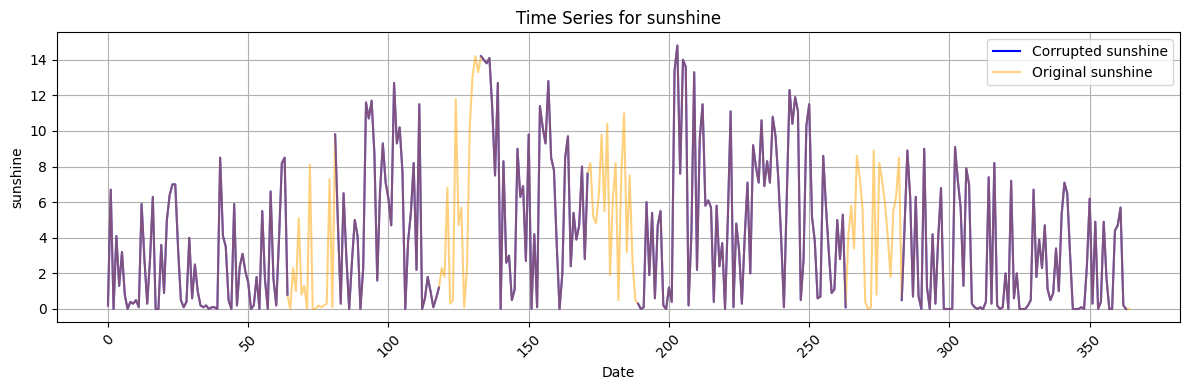

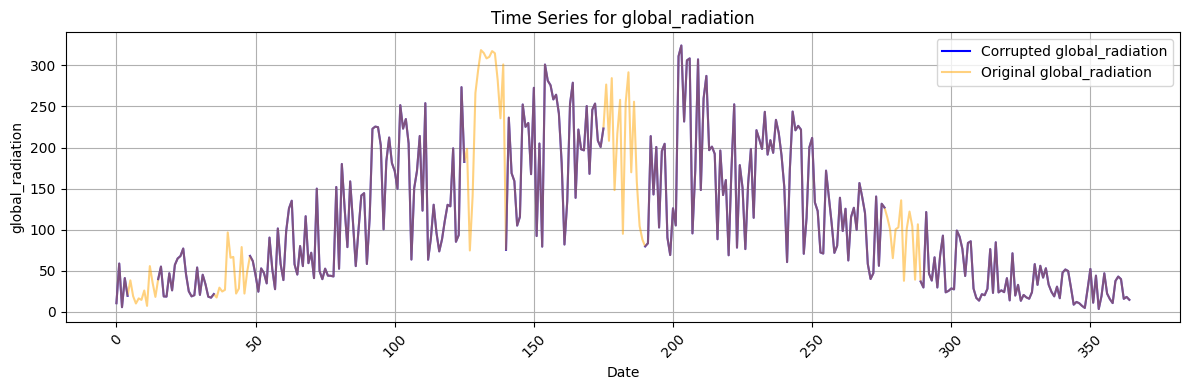

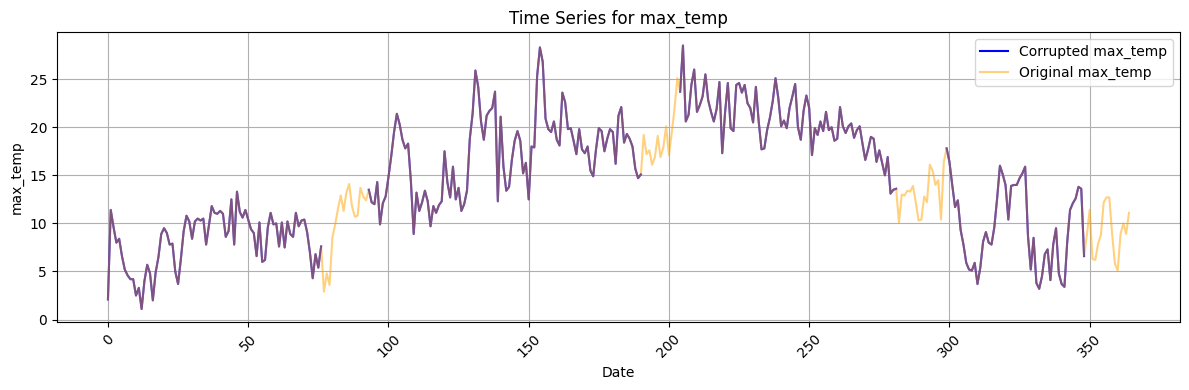

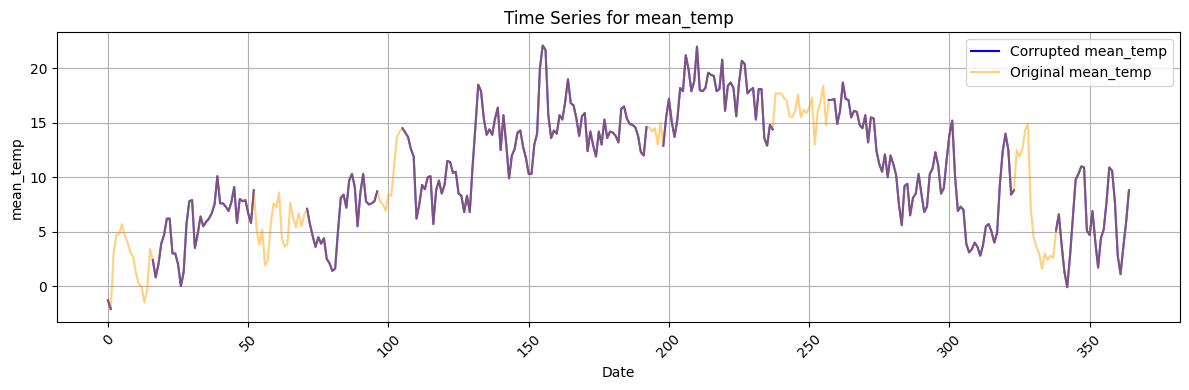

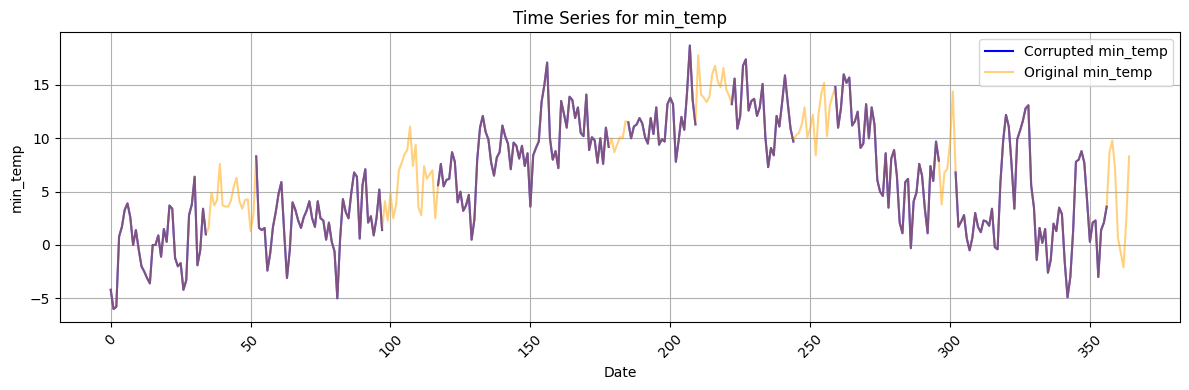

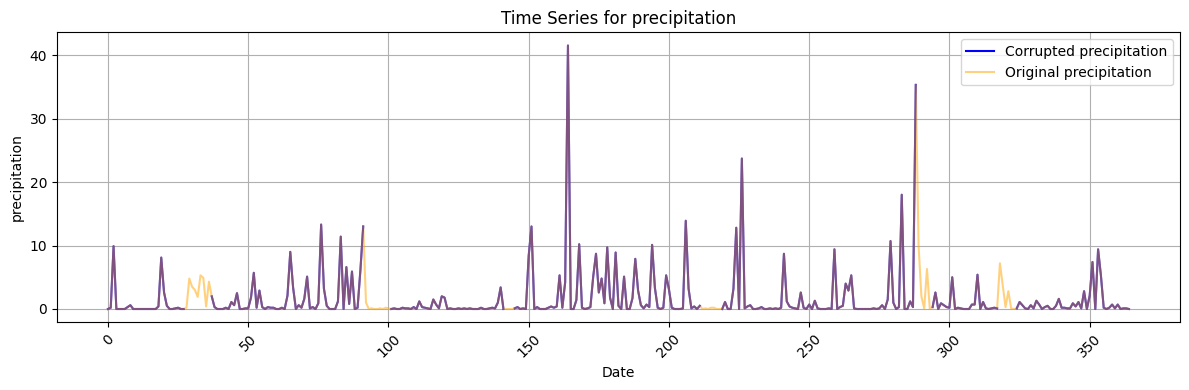

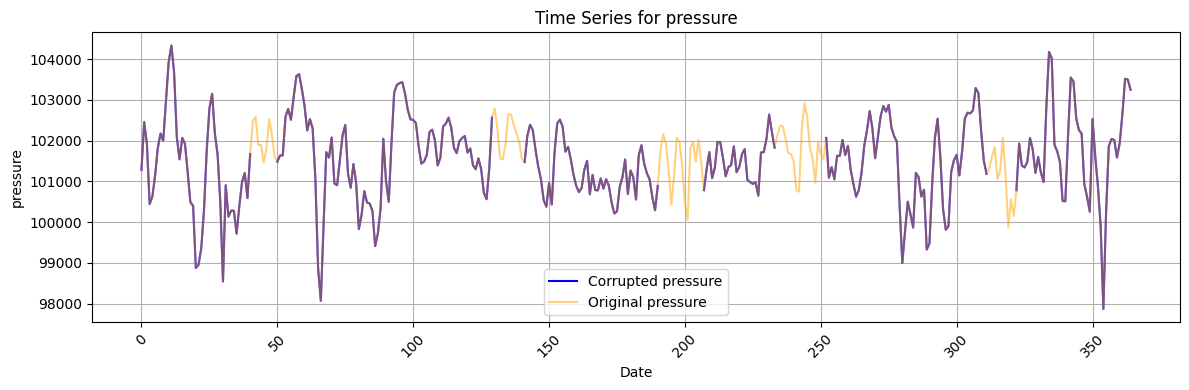

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据
df0 = pd.read_csv('/content/drive/MyDrive/DL_HW2/training_set/training_set_0.csv')
df0_nogaps = pd.read_csv('/content/drive/MyDrive/DL_HW2/training_set/training_set_0_nogaps.csv')

# 选择展示第一个十年的前365天的数据
df0 = df0.iloc[:365]
df0_nogaps = df0_nogaps.iloc[:365]

# 绘制每个变量的时间序列
variables = ['cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 'mean_temp', 'min_temp', 'precipitation', 'pressure']
for i, var in enumerate(variables):
    plt.figure(figsize=(12, 4))  # 设置每个图形的大小

    # 绘制损坏后的数据
    plt.plot(df0['date'], df0[var], label=f'Corrupted {var}', color='blue',  linestyle='-', markersize=4)

    # 绘制原始数据
    plt.plot(df0_nogaps['date'], df0_nogaps[var], label=f'Original {var}', color='orange', alpha=0.5, linestyle='-', markersize=4)

    plt.title(f'Time Series for {var}')  # 设置图标题
    plt.xlabel('Date')  # 设置x轴标签
    plt.ylabel(var)  # 设置y轴标签
    plt.legend()  # 添加图例
    plt.grid(True)  # 显示网格
    plt.xticks(rotation=45)  # 旋转x轴标签以便清晰显示
    plt.tight_layout()  # 自动调整子图参数, 使之填充整个图像区域
    plt.show()  # 显示图形


还要画test set的line plot！！！！！！！！！

In [ ]:
# 示例代码检查DataFrame是否正确加载
# print(df0.head())
print(df0_nogaps.head())
# print(df1.head())
# print(df1_nogaps.head())
# print(df2.head())
# print(df2_nogaps.head())

# 检查DataFrame的形状
print(df0.shape, df0_nogaps.shape)
print(df1.shape, df1_nogaps.shape)
print(df2.shape, df2_nogaps.shape)


   date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0     0          4.0       0.2              10.6       2.1       -1.3   
1     1          2.0       6.7              58.8      11.4       -2.1   
2     2          7.9      -0.0               5.7       9.6        3.0   
3     3          4.9       4.1              41.1       8.0        4.7   
4     4          3.9       1.3              19.5       8.4        4.8   

   min_temp  precipitation  pressure  
0      -4.2            0.0  101282.7  
1      -6.0            0.2  102455.7  
2      -5.8            9.9  101920.4  
3       0.8            0.0  100441.5  
4       1.7            0.0  100625.2  
(3652, 9) (365, 9)
(3651, 9) (3651, 9)
(3651, 9) (3651, 9)


### **Histograms for all decades**

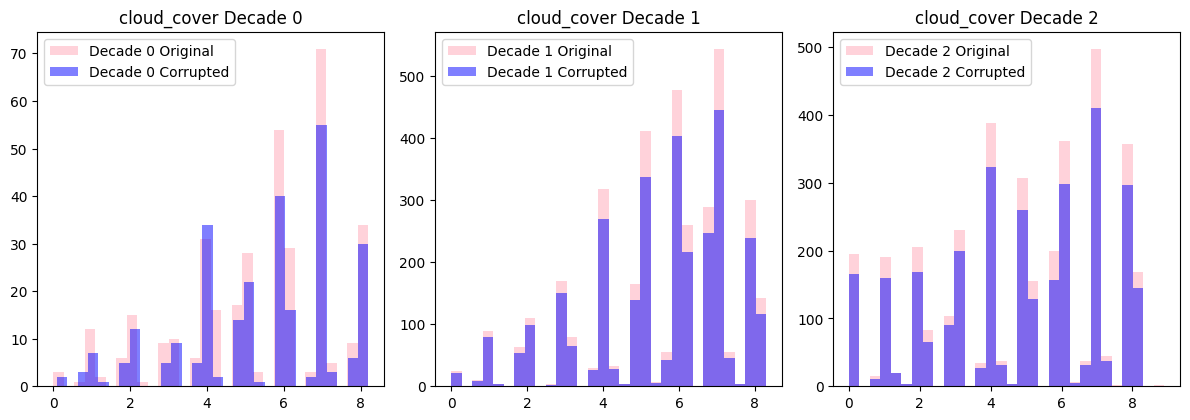

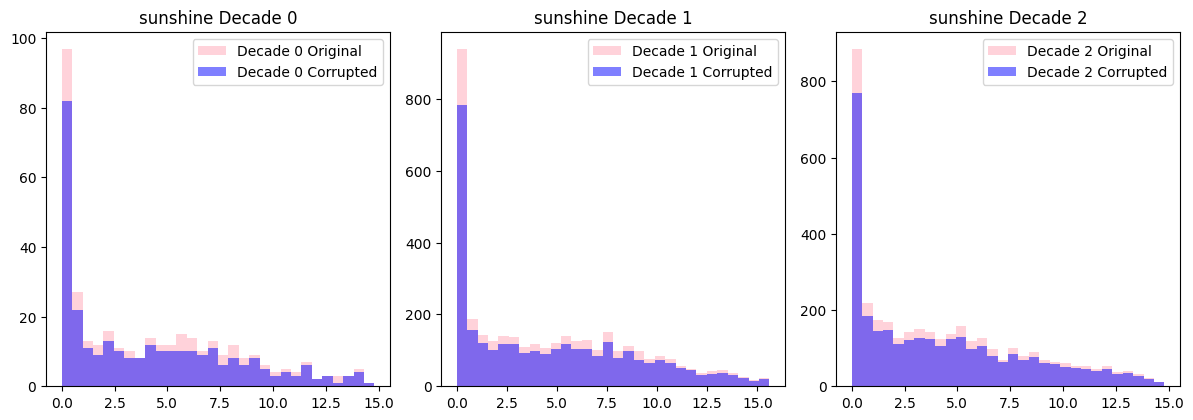

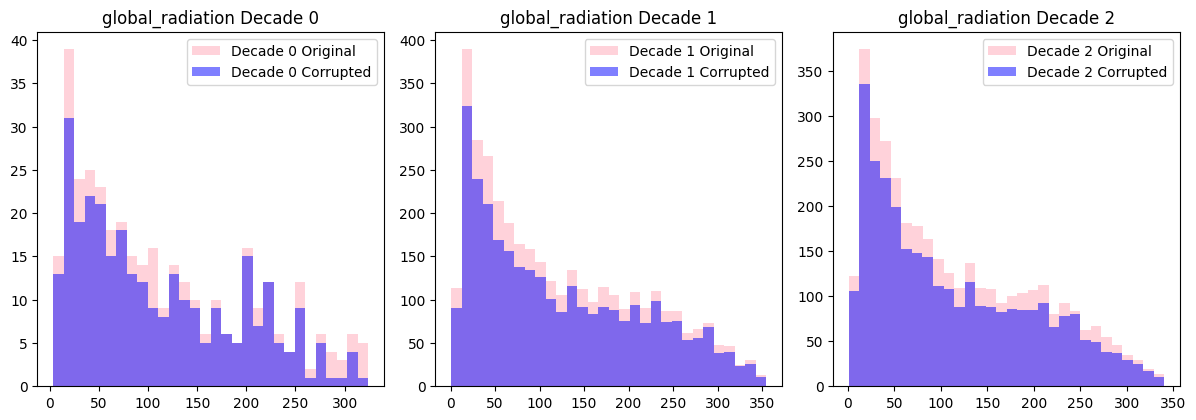

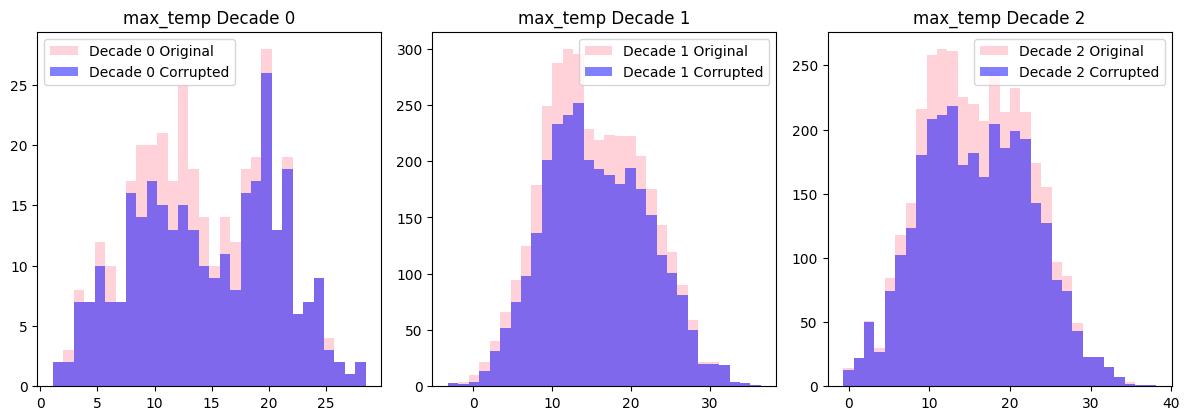

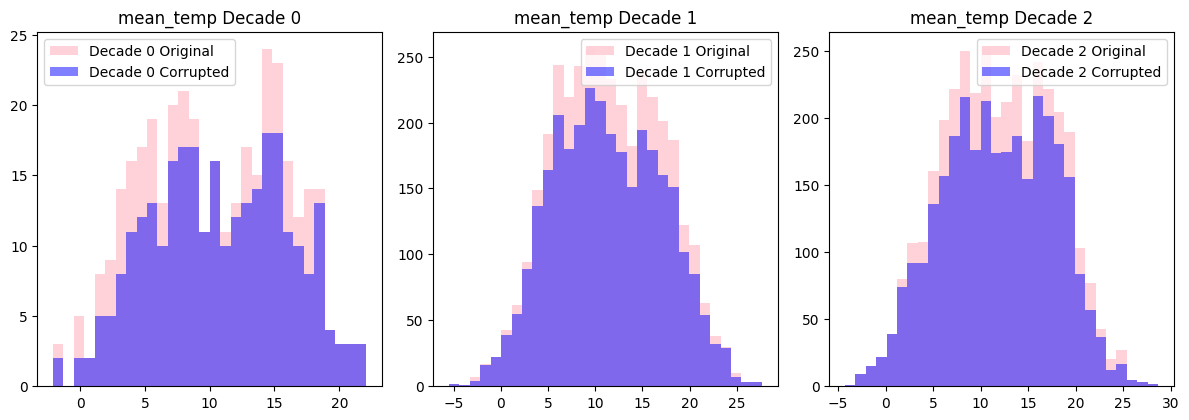

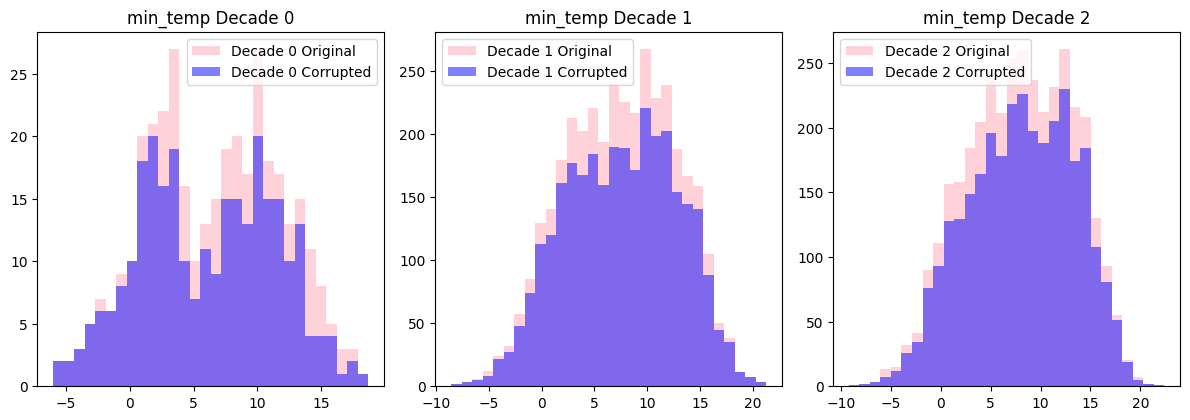

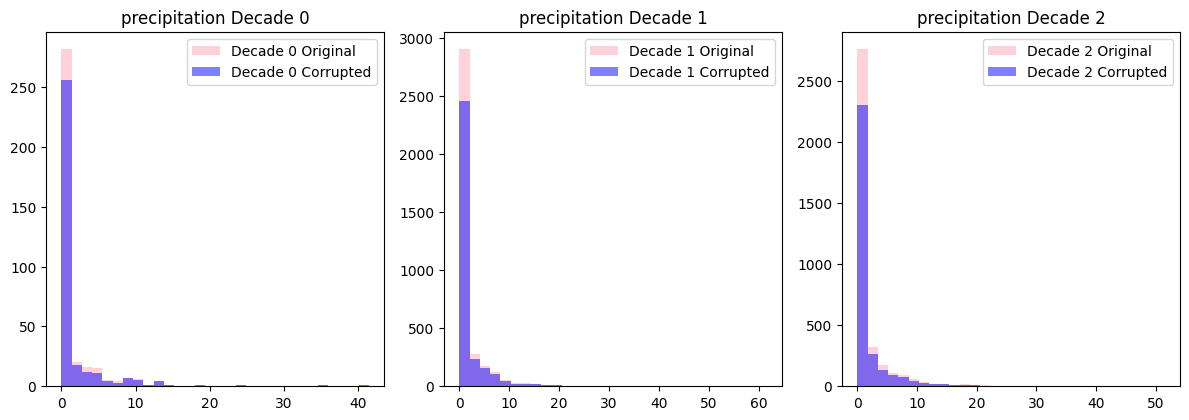

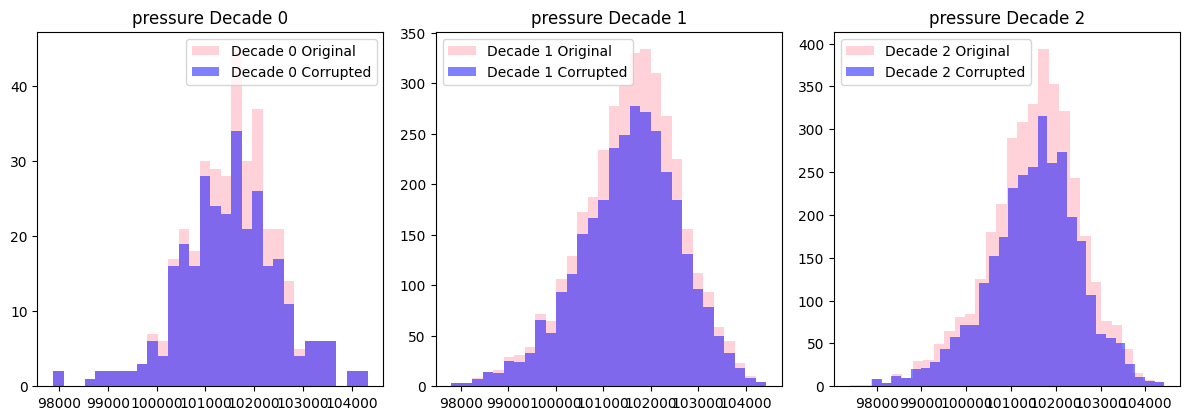

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 加载所有数据集
df0 = pd.read_csv('/content/training_set_0.csv')
df0_nogaps = pd.read_csv('/content/training_set_0_nogaps.csv')
df1 = pd.read_csv('/content/drive/MyDrive/DL_HW2/training_set/training_set_1.csv')
df1_nogaps = pd.read_csv('/content/drive/MyDrive/DL_HW2/training_set/training_set_1_nogaps.csv')
df2 = pd.read_csv('/content/drive/MyDrive/DL_HW2/training_set/training_set_2.csv')
df2_nogaps = pd.read_csv('/content/drive/MyDrive/DL_HW2/training_set/training_set_2_nogaps.csv')

# 列出所有变量
variables = ['cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 'mean_temp', 'min_temp', 'precipitation', 'pressure']

# 对每个变量绘制直方图
for var in variables:
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 3, 1)
    plt.hist(df0_nogaps[var], bins=30, color='pink',alpha=0.7,label='Decade 0 Original')
    plt.hist(df0[var].dropna(), bins=30, alpha=0.5, color='blue',label='Decade 0 Corrupted')
    plt.title(f'{var} Decade 0')
    plt.legend()

    plt.subplot(2, 3, 2)
    plt.hist(df1_nogaps[var], bins=30, alpha=0.7,color='pink',label='Decade 1 Original')
    plt.hist(df1[var].dropna(), bins=30, alpha=0.5, color='blue',label='Decade 1 Corrupted')
    plt.title(f'{var} Decade 1')
    plt.legend()

    plt.subplot(2, 3, 3)
    plt.hist(df2_nogaps[var], bins=30, alpha=0.7,color='pink',label='Decade 2 Original')
    plt.hist(df2[var].dropna(), bins=30, alpha=0.5, color='blue',label='Decade 2 Corrupted')
    plt.title(f'{var} Decade 2')
    plt.legend()

    plt.tight_layout()
    plt.show()


也要画test的histogram

<br>

---

<br>

## **Question 2**  (25%)

Using the data loaded in **Question 1**, create a PyTorch `TensorDataset`, and create one `DataLoader` for the training set and another one for the test set.

The training loader should provide batches of weather data that have been corrupted, as well as the corresponding, paired un-corrupted batch of data. The test loader should provide batches of corrupted weather data, with no corresponding uncorrupted labels.

Using line plots, show here one batch from both the training and test datasets before and after corruption. Use different axis windows for input and label of the batch.

<br>



### Load dataset

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import matplotlib.pyplot as plt


# 加载数据
df_test = pd.read_csv('/content/drive/MyDrive/DL_HW2/test_set.csv')

# 提取变量名（除去日期列）
variables = df0.columns[1:]
# print(variables)

# # 合并训练数据
# df_train_corrupted = pd.concat([df0, df1, df2])
# df_train_nogaps = pd.concat([df0_nogaps, df1_nogaps, df2_nogaps])

# Here use decade1 as training set
# 转换为PyTorch张量
train_corrupted = torch.tensor(df1.iloc[:, 1:].values, dtype=torch.float32)
train_nogaps = torch.tensor(df1_nogaps.iloc[:, 1:].values, dtype=torch.float32)
test_corrupted = torch.tensor(df_test.iloc[:, 1:].values, dtype=torch.float32)


# 创建TensorDataset
train_dataset = TensorDataset(train_corrupted, train_nogaps)
test_dataset = TensorDataset(test_corrupted)
# 创建DataLoader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)



### Visualisation

把图片格式调小一点放在grid里，parameter对应起来


Plotting Training Set Data


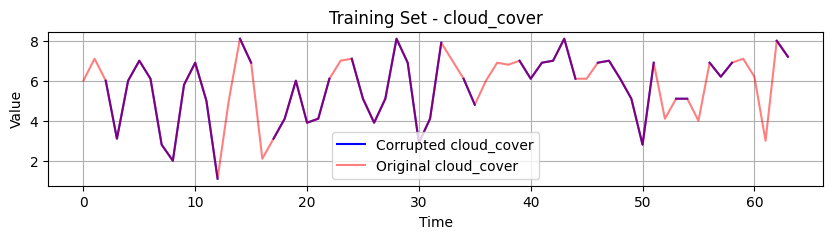

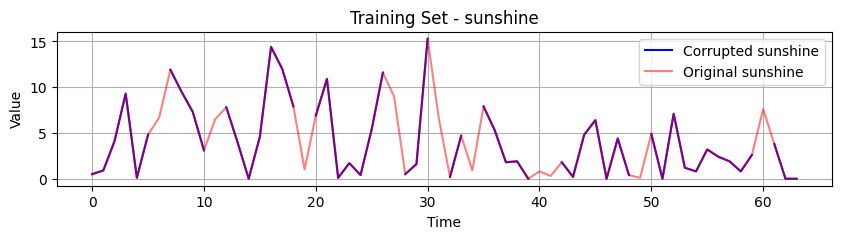

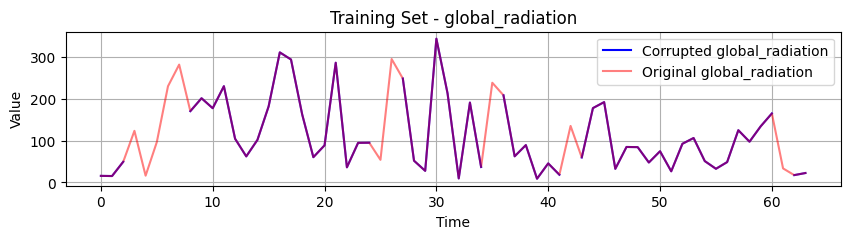

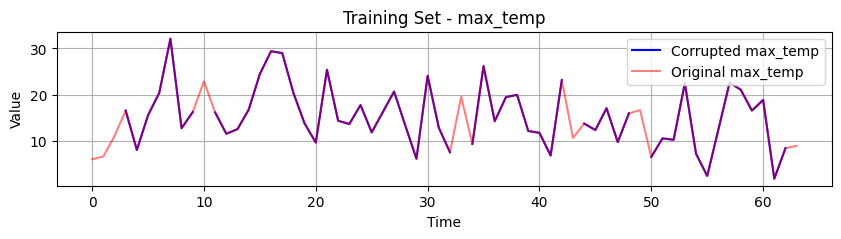

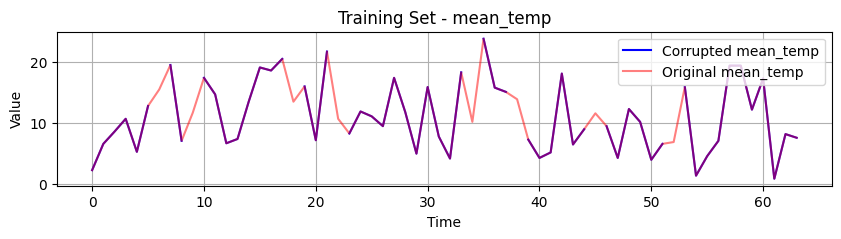

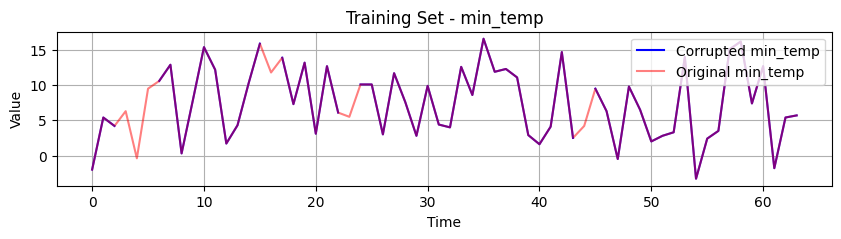

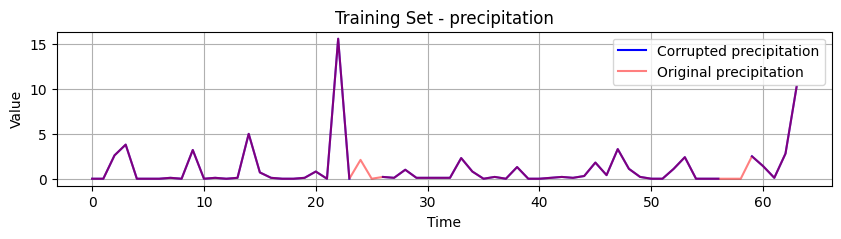

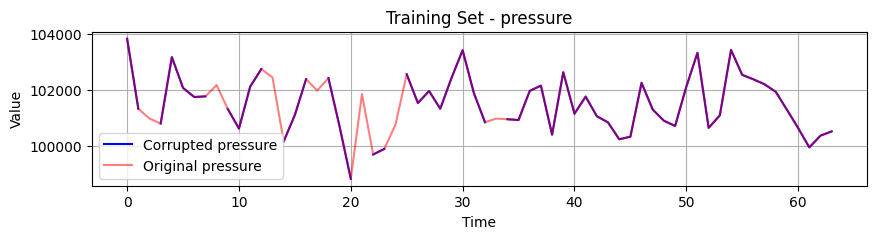

Plotting Test Set Data


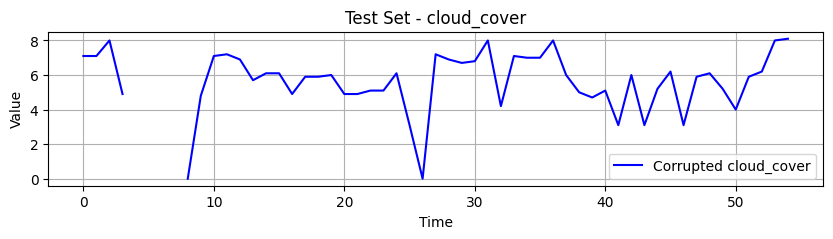

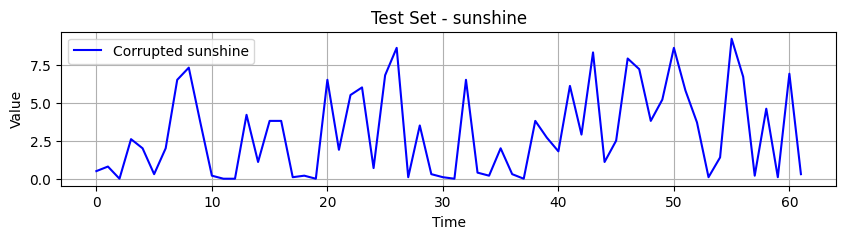

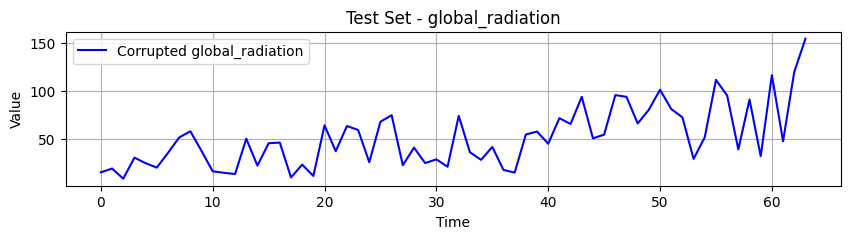

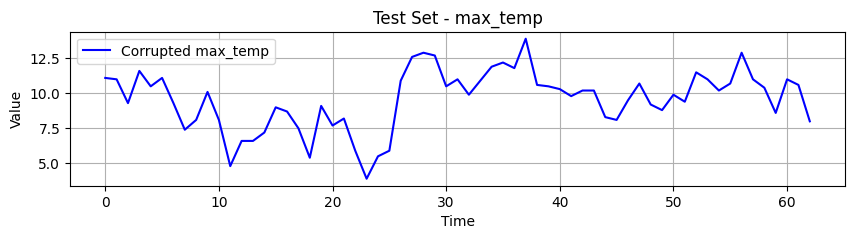

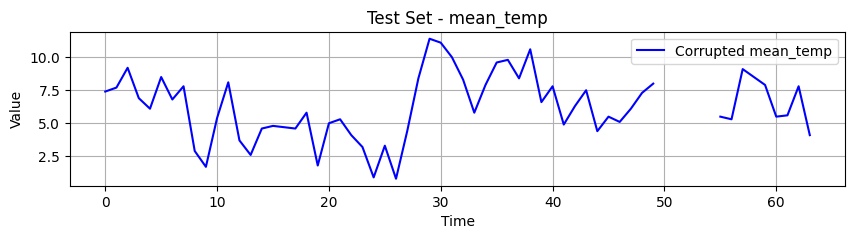

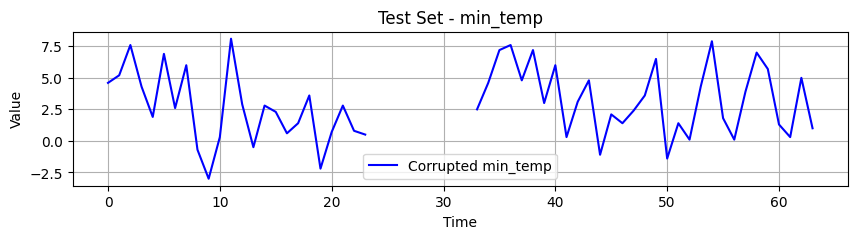

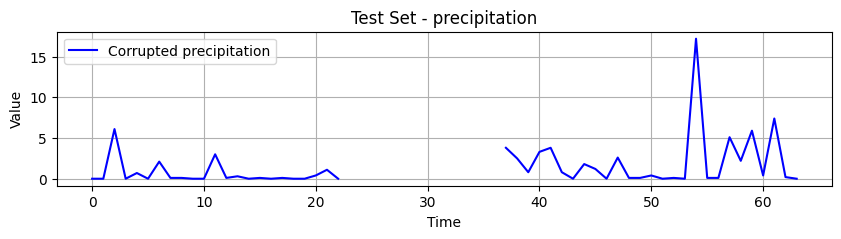

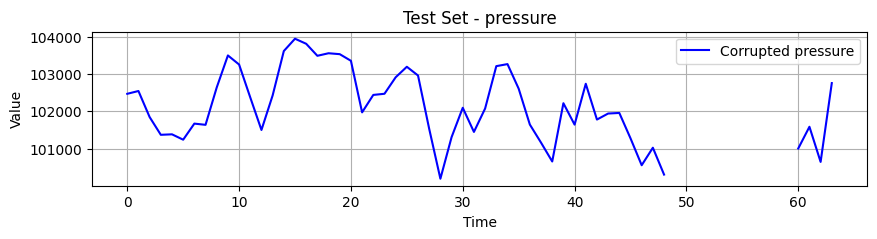

In [ ]:
def plot_data(loader, variables, is_train=True):
    # 获取一个批次的数据
    for batch in loader:
        data = batch[0]  # 损坏的数据
        if is_train:
            labels = batch[1]  # 未损坏的数据
        break  # 只读取第一个批次

    # 绘制每个变量
    for idx, var in enumerate(variables):
        plt.figure(figsize=(10, 2))

        # 绘制损坏后的数据
        plt.plot(data[:, idx].numpy(), label=f'Corrupted {var}', color='blue', linestyle='-')

        if is_train:
            # 绘制未损坏的数据
            plt.plot(labels[:, idx].numpy(), label=f'Original {var}', color='red', alpha=0.5,linestyle='-')
            plt.title(f'Training Set - {var}')
        else:
            plt.title(f'Test Set - {var}')

        plt.xlabel('Time')
        plt.ylabel('Value')
        plt.legend()
        plt.grid(True)
        plt.show()

# 调用绘图函数
print("Plotting Training Set Data")
plot_data(train_loader, variables, is_train=True)

print("Plotting Test Set Data")
plot_data(test_loader, variables, is_train=False)


<br>

---

<br>

## **Question 3** (50%)

Using the dataset created in **Question 2**, design and train an architecture to recover the missing weather values of the provided test dataset.

Using line plots, show the test weather data with the missing values filled in using a different colour.

Additionally, save the test data with the missing values filled in into a file called `test_set_nogaps.csv` inside this repository. This file should have the same format as the original `test_set.csv` file, with the same number of rows and columns, the same row and column ordering, and the same column headings.

You have freedom to choose an architecture that you consider appropriate to solve this problem. However, you will need to train your chosen architecture as part of the assessment: **pre-trained networks are not allowed**.

You will be assessed by the quality of your predictions of the missing data values and additional marks will be given for originality in your network design choices. You should include, as part of your answer, a paragraph explaining the architecture you have chosen and any additional design choices and hyperparameters that have been important to build your solution.

This is an open-book assessment and you are encouraged to use resources online, including  tools like chatGPT. However, make sure to always mention the sources for your code and ideas, including websites, papers, and tools like chatGPT.

<br>


### RNN

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class WeatherRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(WeatherRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)  # RNN layer
        self.fc = nn.Linear(hidden_size, hidden_size)  # Fully connected layer
        self.norm = nn.LayerNorm(hidden_size)  # Layer normalization

    def forward(self, x):
        x, hidden = self.rnn(x)
        # Apply layer normalization
        x = self.norm(x)
        # Residual connection: skip connection from input to the output of the RNN layer
        residual = self.fc(x)
        x = self.fc(x)
        # Add the residual (skip connection)
        x += residual
        return x



def train_variable_model(data_loader, variable_idx, epochs=10):
    # 设定模型参数
    input_size = 1  # 使用单变量
    hidden_size = 50  # 可调整的隐藏层大小
    output_size = 1  # 输出单一预测值

    model = WeatherRNN(input_size, hidden_size, output_size)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-6)

    # 训练模型
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for batch in data_loader:
            data, targets = batch

            data[torch.isnan(data)] = 0
            data[torch.isinf(data)] = 0
            targets[torch.isnan(targets)] = 0
            targets[torch.isinf(targets)] = 0

            if data.dim() == 2:
                data = data.unsqueeze(1)
            if targets.dim() == 2:
                targets = targets.unsqueeze(1)
            # 提取单个变量
            data = data[:, :, variable_idx].unsqueeze(-1)
            targets = targets[:,:, variable_idx].unsqueeze(-1)

            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, targets)
            loss.backward()
            # gradient crop
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
            optimizer.step()

            total_loss += loss.item()
        print(f'Epoch {epoch+1}, Loss: {total_loss / len(data_loader)}')

    return model

# 训练每个变量的模型
models = []
for i in range(len(variables)):
    print(f'Training model for {variables[i]}')
    loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    model = train_variable_model(loader, i, epochs=10)
    models.append(model)




# def plot_filled_data(test_loader, models, variables):
#     with torch.no_grad():
#         for data in test_loader:
#             plt.figure(figsize=(14, 7))
#             for i, model in enumerate(models):
#                 # 预测缺失值
#                 output = model(data[:, :, i].unsqueeze(-1))
#                 plt.subplot(len(variables), 1, i+1)
#                 plt.plot(data[:, i].numpy(), label='Corrupted', color='red')
#                 plt.plot(output.numpy(), label='Filled', color='blue')
#                 plt.title(variables[i])
#                 plt.legend()
#             plt.tight_layout()
#             plt.show()
#             break  # 只展示一个批次的填充结果

# plot_filled_data(test_loader, models, variables)




# filled_data = []
# with torch.no_grad():
#     for data in test_loader:
#         batch_filled = []
#         for i, model in enumerate(models):
#             output = model(data[:, :, i].unsqueeze(-1))
#             batch_filled.append(output)
#         filled_data.append(torch.stack(batch_filled, dim=2))
# filled_data = torch.cat(filled_data, dim=0)
# df_filled_test = pd.DataFrame(filled_data.numpy(), columns=variables)
# df_filled_test.to_csv('/content/drive/MyDrive/DL_HW2/test_set_nogaps.csv', index=False)


Training model for cloud_cover


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([32, 1, 1])) that is different to the input size (torch.Size([32, 1, 50])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1, Loss: 34.98450309089992
Epoch 2, Loss: 35.06605733788532
Epoch 3, Loss: 34.827452684485394
Epoch 4, Loss: 34.66783860248068
Epoch 5, Loss: 34.6583273348601
Epoch 6, Loss: 34.531177155867866
Epoch 7, Loss: 34.41562645953635
Epoch 8, Loss: 34.267263412475586
Epoch 9, Loss: 34.0911901059358
Epoch 10, Loss: 33.93594363668691
Training model for sunshine
Epoch 1, Loss: 39.39258572951607
Epoch 2, Loss: 38.895525492792544
Epoch 3, Loss: 39.12845999676248
Epoch 4, Loss: 39.02116520093835
Epoch 5, Loss: 38.92098387013311
Epoch 6, Loss: 39.12506053758704
Epoch 7, Loss: 38.69969449250594
Epoch 8, Loss: 38.39772177986477
Epoch 9, Loss: 38.63404811361562
Epoch 10, Loss: 38.073220912269925
Training model for global_radiation
Epoch 1, Loss: 23189.977590013586
Epoch 2, Loss: 23313.288960597827
Epoch 3, Loss: 23258.33157269022
Epoch 4, Loss: 23147.350798233696
Epoch 5, Loss: 23266.034077785327
Epoch 6, Loss: 23066.71648267663
Epoch 7, Loss: 23239.84366508152
Epoch 8, Loss: 23228.12601052989
Epo

I use the simple RNN first to impute missing value of training data, but the loss is huge, so I try to use LSTM combined with Automatic Encoder to capture long time dependencies as weather data is highly time-dependent. And encoder decoder allow model to recover spatial information between sequences.

### LSTM + AE

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class WeatherLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(WeatherLSTM, self).__init__()
        # Encoder LSTM
        self.encoder_lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        # Decoder LSTM
        self.decoder_lstm = nn.LSTM(hidden_size, hidden_size, batch_first=True)
        # Fully connected layer to predict the next value
        self.fc = nn.Linear(hidden_size, output_size)
        self.norm = nn.LayerNorm(hidden_size)  # Layer normalization

    def forward(self, x):
        # Encoding
        x, (hidden, cell) = self.encoder_lstm(x)
        # Layer normalization on encoder outputs
        x = self.norm(x)

        # Decoding
        # We use the last hidden state from encoder to start the decoder
        x, _ = self.decoder_lstm(x, (hidden, cell))
        # Applying the fully connected layer
        x = self.fc(x)
        return x

def train_variable_model(data_loader, variable_idx, epochs=10):
    input_size = 1  # Single variable
    hidden_size = 50  # Hidden layer size
    output_size = 1  # Single prediction output

    model = WeatherLSTM(input_size, hidden_size, output_size)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-4)

    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for batch in data_loader:
            data, targets = batch

            data[torch.isnan(data)] = 0
            data[torch.isinf(data)] = 0
            targets[torch.isnan(targets)] = 0
            targets[torch.isinf(targets)] = 0

            if data.dim() == 2:
                data = data.unsqueeze(1)
            if targets.dim() == 2:
                targets = targets.unsqueeze(1)

            data = data[:, :, variable_idx].unsqueeze(-1)
            targets = targets[:, :, variable_idx].unsqueeze(-1)

            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, targets)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
            optimizer.step()

            total_loss += loss.item()
        print(f'Epoch {epoch+1}, Loss: {total_loss / len(data_loader)}')

    return model

models = []
for i in range(len(variables)):
    print(f'Training model for {variables[i]}')
    loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    model = train_variable_model(loader, i, epochs=10)
    models.append(model)


Training model for cloud_cover
Epoch 1, Loss: 31.000726815928584
Epoch 2, Loss: 24.136023853136145
Epoch 3, Loss: 16.37011601821236
Epoch 4, Loss: 10.062038276506508
Epoch 5, Loss: 6.053461363004602
Epoch 6, Loss: 3.9556620701499607
Epoch 7, Loss: 3.2215200102847557
Epoch 8, Loss: 2.9645391671553902
Epoch 9, Loss: 2.5474222048469213
Epoch 10, Loss: 2.0559008919674415
Training model for sunshine
Epoch 1, Loss: 37.079848264611286
Epoch 2, Loss: 29.906758797687033
Epoch 3, Loss: 22.830197732344917
Epoch 4, Loss: 17.99468354764192
Epoch 5, Loss: 14.97402549204619
Epoch 6, Loss: 12.984364837148915
Epoch 7, Loss: 11.316364835656207
Epoch 8, Loss: 9.9432564486628
Epoch 9, Loss: 8.771276903152465
Epoch 10, Loss: 7.798703761722731
Training model for global_radiation
Epoch 1, Loss: 23206.454093070653
Epoch 2, Loss: 22760.675938349184
Epoch 3, Loss: 22545.379899796197
Epoch 4, Loss: 22162.410912024458
Epoch 5, Loss: 22100.089699388587
Epoch 6, Loss: 21860.128931725543
Epoch 7, Loss: 21759.1644191

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from torch.utils.data import DataLoader

class WeatherLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(WeatherLSTM, self).__init__()
        self.encoder_lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.decoder_lstm = nn.LSTM(hidden_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.norm = nn.LayerNorm(hidden_size)  # Layer normalization

    def forward(self, x):
        x, (hidden, cell) = self.encoder_lstm(x)
        x = self.norm(x)
        x, _ = self.decoder_lstm(x, (hidden, cell))
        x = self.fc(x)
        return x

def train_variable_model(data_loader, variable_idx,  scaler,epochs=10):
    input_size = 1
    hidden_size = 50
    output_size = 1

    model = WeatherLSTM(input_size, hidden_size, output_size)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-4)

    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for batch in data_loader:
            data, targets = batch

            # Data preprocessing
            data = scaler.fit_transform(data.numpy().reshape(-1, 1)).reshape(data.shape)
            targets = scaler.transform(targets.numpy().reshape(-1, 1)).reshape(targets.shape)
            data, targets = torch.tensor(data, dtype=torch.float32), torch.tensor(targets, dtype=torch.float32)

            # data[torch.isnan(data)] = 0
            # data[torch.isinf(data)] = 0
            # targets[torch.isnan(targets)] = 0
            # targets[torch.isinf(targets)] = 0

            if data.dim() == 2:
                data = data.unsqueeze(1)
            if targets.dim() == 2:
                targets = targets.unsqueeze(1)

            data = data[:, :, variable_idx].unsqueeze(-1)
            targets = targets[:, :, variable_idx].unsqueeze(-1)

            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, targets)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
            optimizer.step()

            total_loss += loss.item()
        print(f'Epoch {epoch+1}, Loss: {total_loss / len(data_loader)}')

    return model

# Initialize scalers for each variable
scalers = {v: StandardScaler() for v in variables}

models = []
for i, v in enumerate(variables):
    print(f'Training model for {v}')
    loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    model = train_variable_model(loader, i, epochs=10, scaler=scalers[v])
    models.append(model)


Training model for cloud_cover
Epoch 1, Loss: 0.07205807486539213
Epoch 2, Loss: 0.0002749292498972112
Epoch 3, Loss: 0.00023907384673883006
Epoch 4, Loss: 0.00028728208908655295
Epoch 5, Loss: 0.0003108326224205287
Epoch 6, Loss: 0.00029691706024945945
Epoch 7, Loss: 0.0002670361843179901
Epoch 8, Loss: 0.00028071697306289857
Epoch 9, Loss: 0.00022773539700092046
Epoch 10, Loss: 0.0002966928493902821
Training model for sunshine
Epoch 1, Loss: 0.016991369743608747
Epoch 2, Loss: 0.0003537001657684374
Epoch 3, Loss: 0.00033608546854457414
Epoch 4, Loss: 0.00025742947868623203
Epoch 5, Loss: 0.00031542478196253955
Epoch 6, Loss: 0.0002562545434962569
Epoch 7, Loss: 0.0002689462846339428
Epoch 8, Loss: 0.00026696967732514957
Epoch 9, Loss: 0.00030807930395835485
Epoch 10, Loss: 0.00031029344376757646
Training model for global_radiation
Epoch 1, Loss: 0.030164808141695254
Epoch 2, Loss: 0.00033508395485430653
Epoch 3, Loss: 0.00046019950473039545
Epoch 4, Loss: 0.00033892086792389897
Epoch

<br>

---

<br>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

class WeatherLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(WeatherLSTM, self).__init__()
        self.encoder_lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.decoder_lstm = nn.LSTM(hidden_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.norm = nn.LayerNorm(hidden_size)  # Layer normalization

    def forward(self, x):
        x, (hidden, cell) = self.encoder_lstm(x)
        x = self.norm(x)
        x, _ = self.decoder_lstm(x, (hidden, cell))
        x = self.fc(x)
        return x

def train_and_validate(data_loader, val_loader, variable_idx, scaler, epochs=10):
    input_size = 1
    hidden_size = 50
    output_size = 1

    model = WeatherLSTM(input_size, hidden_size, output_size)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-4)

    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for data, targets in data_loader:
            data, targets = preprocess(data, targets, scaler, variable_idx)
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, targets)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
            optimizer.step()
            total_loss += loss.item()
        train_losses.append(total_loss / len(data_loader))

        # Validation phase
        model.eval()
        total_val_loss = 0
        with torch.no_grad():
            for data, targets in val_loader:
                data, targets = preprocess(data, targets, scaler, variable_idx)
                outputs = model(data)
                val_loss = criterion(outputs, targets)
                total_val_loss += val_loss.item()
        val_losses.append(total_val_loss / len(val_loader))
        print(f'Epoch {epoch+1}, Train Loss: {train_losses[-1]}, Validation Loss: {val_losses[-1]}')

    return model, train_losses, val_losses

def preprocess(data, targets, scaler, variable_idx):
    # Data preprocessing
    data = scaler.fit_transform(data.numpy().reshape(-1, 1)).reshape(data.shape)
    targets = scaler.transform(targets.numpy().reshape(-1, 1)).reshape(targets.shape)
    data, targets = torch.tensor(data, dtype=torch.float32), torch.tensor(targets, dtype=torch.float32)

    data[torch.isnan(data)] = 0
    if data.dim() == 2:
        data = data.unsqueeze(1)
    if targets.dim() == 2:
        targets = targets.unsqueeze(1)

    data = data[:, :, variable_idx].unsqueeze(-1)
    targets = targets[:, :, variable_idx].unsqueeze(-1)
    return data, targets

def plot_losses(train_losses, val_losses):
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Loss Progress')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Split data into train and validation sets
loader = DataLoader(train_dataset, batch_size=32, shuffle=True)  # Assuming total_data is defined
train_size = int(0.8 * len(loader))
val_size = len(loader) - train_size
train_dataset, val_dataset = random_split(loader, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Train and validate model
scaler = StandardScaler()  # Assuming scaler is defined and appropriate
model, train_losses, val_losses = train_and_validate(train_loader, val_loader, variable_idx, scaler, epochs=10)
plot_losses(train_losses, val_losses)


TypeError: train_and_validate() missing 1 required positional argument: 'scaler'

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

# 数据准备
# 读取数据并保留 NaN
corrupted_all = pd.concat([df0,df1,df2])
uncorrupted_all = pd.concat([df0_nogaps,df1_nogaps,df2_nogaps])
test_set = pd.read_csv('/content/drive/MyDrive/DL_HW2/test_set.csv')

# 检查 NaN 的布尔掩码
nan_mask = test_set.isna() # True 表示该位置为 NaN

# 暂时填补 NaN（仅用于模型输入）
train_corrupted_filled = corrupted_all.fillna(corrupted_all.mean())
test_set_filled = test_set.copy().fillna(test_set.mean()) # 用均值暂时填补 NaN

# 标准化数据
scaler = StandardScaler()
corrupted_scaled = scaler.fit_transform(train_corrupted_filled.drop(columns=['date']))
test_scaled = scaler.transform(test_set_filled.drop(columns=['date']))

# 转换为 Tensor
corrupted_tensor = torch.tensor(corrupted_scaled, dtype=torch.float32).unsqueeze(0) # (1, seq_length, features)
test_tensor = torch.tensor(test_scaled, dtype=torch.float32).unsqueeze(0)

# 创建 DataLoader
train_dataset = TensorDataset(corrupted_tensor, corrupted_tensor) # 输入与输出相同
test_dataset = TensorDataset(test_tensor)
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# 定义 LSTM 模型架构
class FillMissingValuesLSTM(nn.Module):
  def _init_(self, input_size, hidden_size, num_layers):
    super(FillMissingValuesLSTM, self)._init_()
    self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
    self.fc = nn.Linear(hidden_size, input_size) # 全连接层将隐藏状态映射回输入大小

  def forward(self, x):
    lstm_out, _ = self.lstm(x) # lstm_out: (batch_size, seq_length, hidden_size)
    out = self.fc(lstm_out) # 全序列映射
    return out

# 初始化 LSTM 模型
hidden_size = 128
num_layers = 2
input_size = corrupted_tensor.shape[2] # 特征数
model = FillMissingValuesLSTM(input_size, hidden_size, num_layers)

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练模型
epochs = 50
for epoch in range(epochs):
  model.train()
  running_loss = 0.0

  for corrupted_batch, target_batch in train_loader:
    optimizer.zero_grad()

    # 前向传播
    predictions = model(corrupted_batch)
    loss = criterion(predictions, target_batch) # 计算所有时间步的损失

    # 反向传播和优化
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

  print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss / len(train_loader)}")

# 模型预测并填补缺失值
model.eval()
with torch.no_grad():
    predictions = model(test_tensor).squeeze(0).numpy() # (seq_length, features)

    # 逆标准化
filled_data = scaler.inverse_transform(predictions)

    # 转换为 DataFrame
filled_df = pd.DataFrame(filled_data, columns=test_set.columns[1:])

# 填补 NaN 值
for col in filled_df.columns:
    # 替换 NaN 的位置
    filled_df.loc[nan_mask[col], col] = filled_df.loc[nan_mask[col], col]
    # 非 NaN 的位置保持原始值
    filled_df.loc[~nan_mask[col], col] = test_set.loc[~nan_mask[col], col]

# 确保数据类型一致
for col in filled_df.columns:
    filled_df[col] = filled_df[col].astype(test_set[col].dtype)

    # 将 'date' 列加回
filled_df['date'] = test_set['date']
filled_df = filled_df[['date'] + [col for col in filled_df.columns if col != 'date']]

    # 打印填补后的数据
print(filled_df.head(10))

TypeError: FillMissingValuesLSTM.__init__() takes 1 positional argument but 4 were given

In [ ]:
import pandas as pd
import numpy as np

# 读取数据
train_df_0 = pd.read_csv('/content/drive/MyDrive/DL_HW2/training_set/training_set_0.csv')
train_nogaps_0 = pd.read_csv('/content/drive/MyDrive/DL_HW2/training_set/training_set_0_nogaps.csv')

train_df_1 = pd.read_csv('/content/drive/MyDrive/DL_HW2/training_set/training_set_1.csv')
train_nogaps_1 = pd.read_csv('/content/drive/MyDrive/DL_HW2/training_set/training_set_1_nogaps.csv')

train_df_2 = pd.read_csv('/content/drive/MyDrive/DL_HW2/training_set/training_set_2.csv')
train_nogaps_2 = pd.read_csv('/content/drive/MyDrive/DL_HW2/training_set/training_set_2_nogaps.csv')

test_df = pd.read_csv('/content/drive/MyDrive/DL_HW2/test_set.csv')

# 函数用于为每个特征创建掩码
def create_mask_columns(df):
    for col in df.columns:
        if df[col].dtype != 'object':  # 假设日期列是唯一的对象类型列
            df[col + '_mask'] = df[col].notna()  # True 表示原始数据中的非缺失值

# 为训练数据和测试数据应用掩码
create_mask_columns(train_df_0)
create_mask_columns(train_df_1)
create_mask_columns(train_df_2)
create_mask_columns(test_df)

# 合并训练数据
train_df = pd.concat([train_df_0, train_df_1, train_df_2])
train_nogaps = pd.concat([train_nogaps_0, train_nogaps_1, train_nogaps_2])

# # 使用掩码处理缺失值
# train_df['mask'] = train_df.isna()
# train_nogaps['mask'] = train_nogaps.notna()




from keras.models import Sequential
from keras.layers import LSTM, Dense, Masking

# 定义模型
model = Sequential()
model.add(Masking(mask_value=0, input_shape=(None, train_df.shape[1]-1)))  # 掩码层处理输入中的NaN值
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(train_df.shape[1]-1))

model.compile(optimizer='adam', loss='mean_squared_error')





# 假设已经进行了适当的预处理和数据划分
model.fit(train_df, train_nogaps, epochs=50, batch_size=32)



test_df['predicted'] = model.predict(test_df)
test_df_filled = test_df.combine_first(test_df['predicted'])
test_df_filled.drop('predicted', axis=1, inplace=True)


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for column in test_df.columns:
    plt.plot(test_df.index, test_df[column], label=f'Original {column}')
    plt.plot(test_df_filled.index, test_df_filled[column], label=f'Filled {column}', linestyle='--')
    plt.legend()
    plt.title('Weather Data Filling')
    plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, 18), dtype=float32). Expected shape (None, None, 17), but input has incompatible shape (None, 18)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 18), dtype=float32)
  • training=True
  • mask=None

Epoch 1/5
343/343 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 1289190272.0000
Epoch 2/5
343/343 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 1288166528.0000
Epoch 3/5
343/343 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1288419840.0000
Epoch 4/5
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1287892736.0000
Epoch 5/5
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1287600000.0000
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


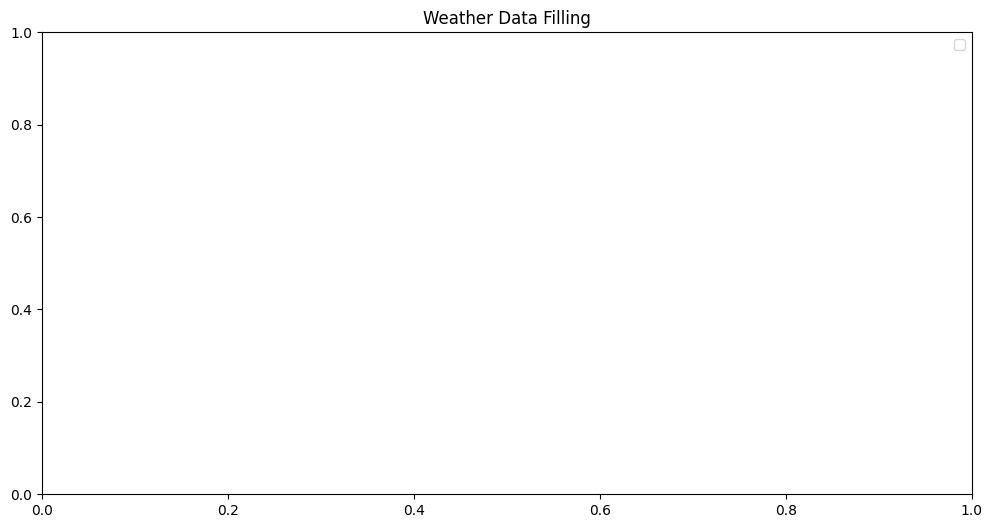

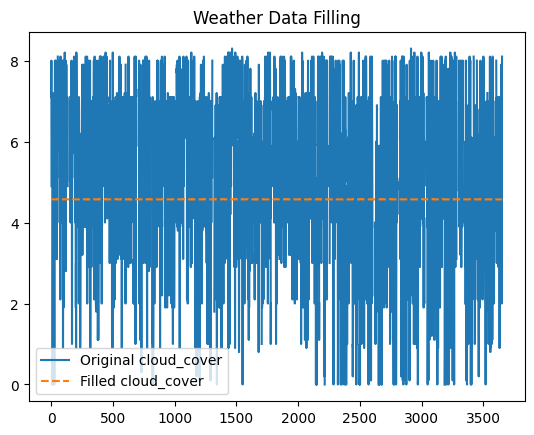

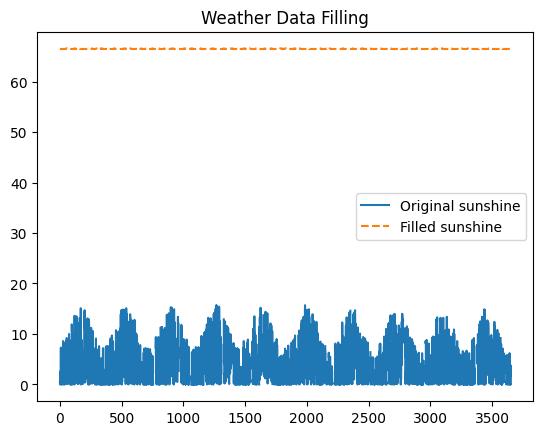

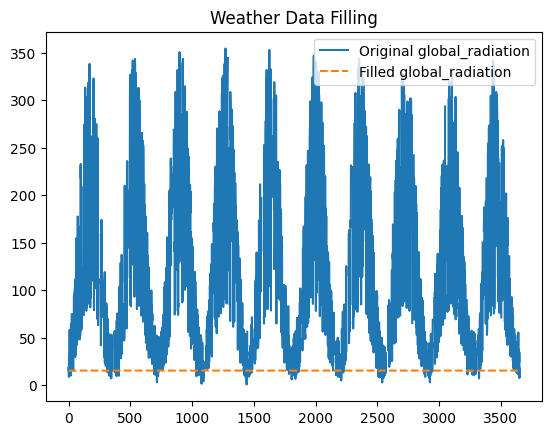

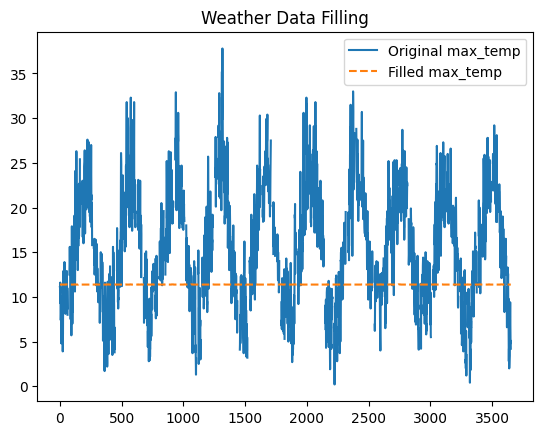

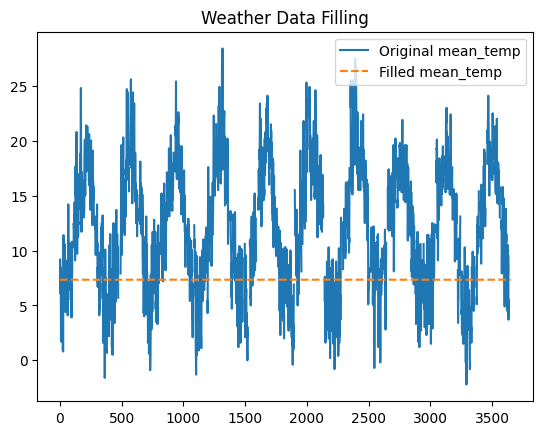

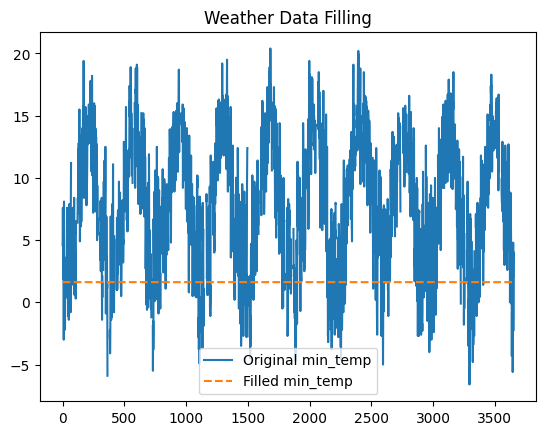

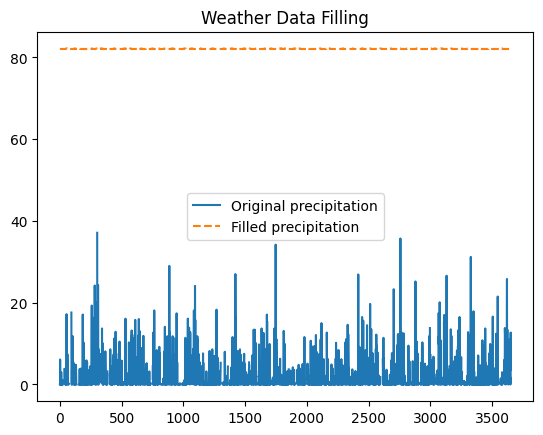

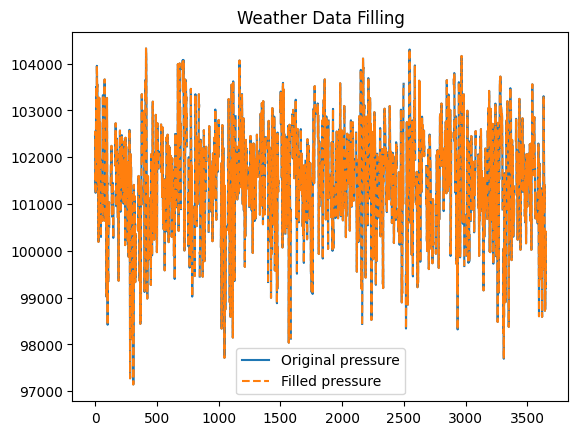

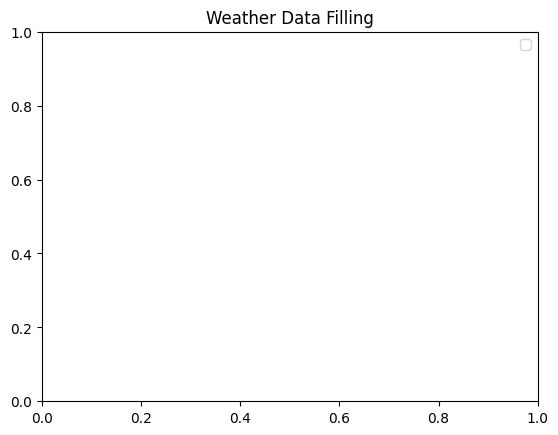

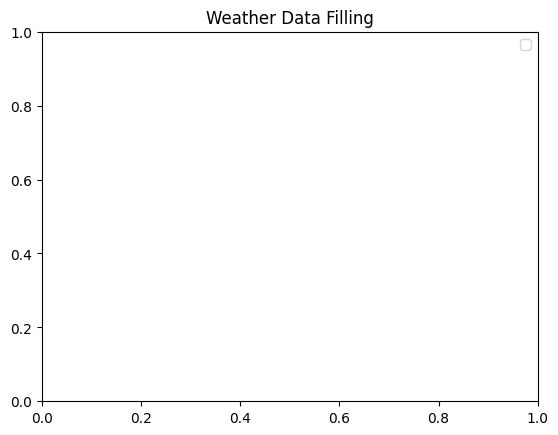

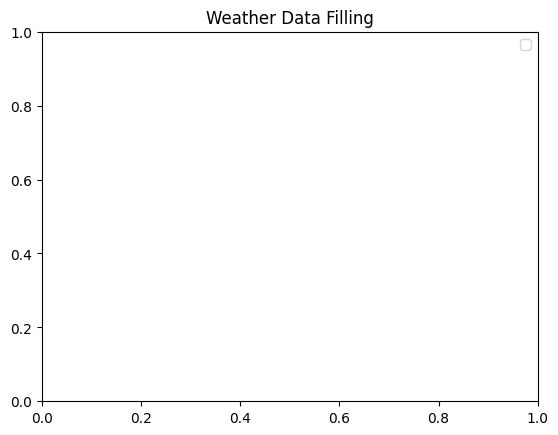

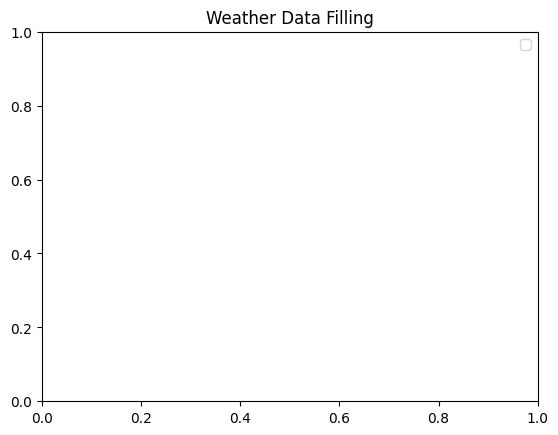

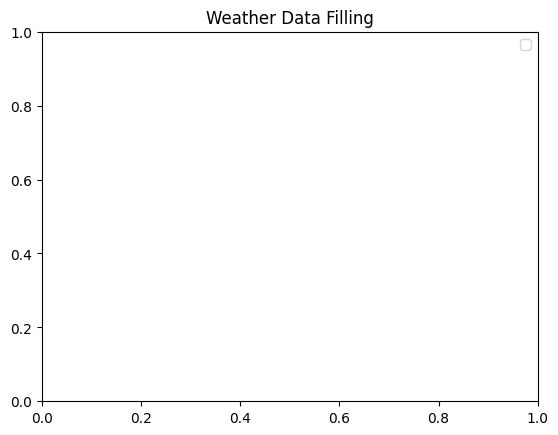

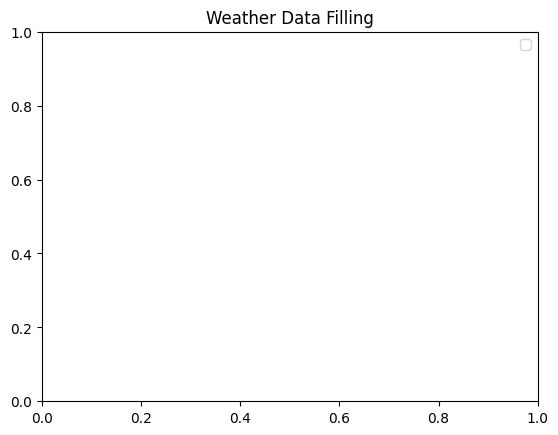

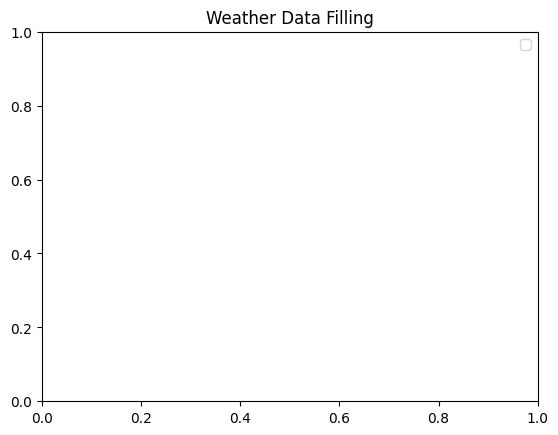

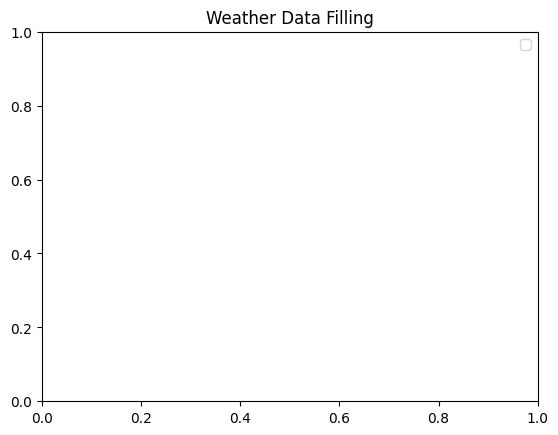

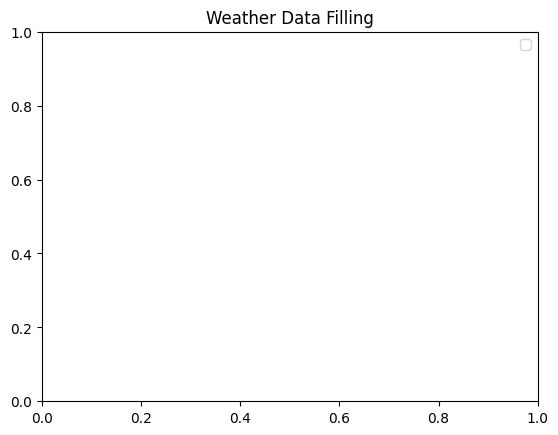

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Masking, Input
from tensorflow.keras.initializers import GlorotUniform
import matplotlib.pyplot as plt

# 数据读取
train_df_0 = pd.read_csv('/content/drive/MyDrive/DL_HW2/training_set/training_set_0.csv')
train_nogaps_0 = pd.read_csv('/content/drive/MyDrive/DL_HW2/training_set/training_set_0_nogaps.csv')
train_df_1 = pd.read_csv('/content/drive/MyDrive/DL_HW2/training_set/training_set_1.csv')
train_nogaps_1 = pd.read_csv('/content/drive/MyDrive/DL_HW2/training_set/training_set_1_nogaps.csv')
train_df_2 = pd.read_csv('/content/drive/MyDrive/DL_HW2/training_set/training_set_2.csv')
train_nogaps_2 = pd.read_csv('/content/drive/MyDrive/DL_HW2/training_set/training_set_2_nogaps.csv')
test_df = pd.read_csv('/content/drive/MyDrive/DL_HW2/test_set.csv')

# 函数用于为每个特征创建掩码
def create_mask_columns(df):
    for col in df.columns:
        if df[col].dtype != 'object':  # 假设日期列是唯一的对象类型列
            df[col + '_mask'] = df[col].notna().astype(int)  # 使用整数掩码

# 应用掩码
create_mask_columns(train_df_0)
create_mask_columns(train_df_1)
create_mask_columns(train_df_2)
create_mask_columns(test_df)

# 合并训练数据
train_df = pd.concat([train_df_0, train_df_1, train_df_2], ignore_index=True)
train_nogaps = pd.concat([train_nogaps_0, train_nogaps_1, train_nogaps_2], ignore_index=True)

# 删除日期列
train_df.drop(columns='date', inplace=True)
train_nogaps.drop(columns='date', inplace=True)

# 转换数据为浮点型并处理NaN
train_x = np.nan_to_num(np.array(train_df, dtype=np.float32), nan=0.0)
train_y = np.nan_to_num(np.array(train_nogaps, dtype=np.float32), nan=0.0)

# 模型定义
input_layer = Input(shape=(None, train_x.shape[1]))
x = Masking(mask_value=0.0)(input_layer)
x = LSTM(50, return_sequences=True, kernel_initializer=GlorotUniform())(x)
x = LSTM(50, return_sequences=True, kernel_initializer=GlorotUniform())(x)  # 保持序列输出
output_layer = Dense(train_y.shape[1], kernel_initializer=GlorotUniform())(x)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
model.fit(train_x[:, np.newaxis, :], train_y[:, np.newaxis, :], epochs=5, batch_size=32)

# 预测测试数据
test_x = np.nan_to_num(np.array(test_df.drop(columns='date'), dtype=np.float32), nan=0.0)
predicted = model.predict(test_x[:, np.newaxis, :])
predicted = predicted.reshape(predicted.shape[0], -1)  # 调整形状以匹配预测结果

# 将预测结果整合回原始DataFrame
test_df_filled = test_df.copy()
for i, column in enumerate(test_df.columns):
    if column != 'date' and not column.endswith('_mask') and i < predicted.shape[1]:
        test_df_filled[column] = predicted[:, i]

# 可视化
plt.figure(figsize=(12, 6))
for column in test_df.columns:
    if not column.endswith('_mask') and column != 'date':
        plt.plot(test_df.index, test_df[column], label=f'Original {column}')
        plt.plot(test_df_filled.index, test_df_filled[column], label=f'Filled {column}', linestyle='--')
    plt.legend()
    plt.title('Weather Data Filling')
    plt.show()

# 保存数据
test_df_filled.to_csv('/content/drive/MyDrive/DL_HW2/test_set_nogaps.csv', index=False)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

# 数据准备
# 读取数据并保留 NaN
corrupted_all = pd.concat([df0,df1,df2])
uncorrupted_all = pd.concat([df0_nogaps,df1_nogaps,df2_nogaps])
test_set = pd.read_csv('/content/drive/MyDrive/DL_HW2/test_set.csv')

# 检查 NaN 的布尔掩码
nan_mask = test_set.isna() # True 表示该位置为 NaN

# 暂时填补 NaN（仅用于模型输入）
train_corrupted_filled = corrupted_all.fillna(corrupted_all.mean())
test_set_filled = test_set.copy().fillna(test_set.mean()) # 用均值暂时填补 NaN

# 标准化数据
scaler = StandardScaler()
corrupted_scaled = scaler.fit_transform(train_corrupted_filled.drop(columns=['date']))
test_scaled = scaler.transform(test_set_filled.drop(columns=['date']))

# 转换为 Tensor
corrupted_tensor = torch.tensor(corrupted_scaled, dtype=torch.float32).unsqueeze(0) # (1, seq_length, features)
test_tensor = torch.tensor(test_scaled, dtype=torch.float32).unsqueeze(0)

# 创建 DataLoader
train_dataset = TensorDataset(corrupted_tensor, corrupted_tensor) # 输入与输出相同
test_dataset = TensorDataset(test_tensor)
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# 定义 LSTM 模型架构
class FillMissingValuesLSTM(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers):
    super(FillMissingValuesLSTM, self).__init__()
    self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
    self.fc = nn.Linear(hidden_size, input_size) # 全连接层将隐藏状态映射回输入大小

  def forward(self, x):
    lstm_out, _ = self.lstm(x) # lstm_out: (batch_size, seq_length, hidden_size)
    out = self.fc(lstm_out) # 全序列映射
    return out

# 初始化 LSTM 模型
hidden_size = 128
num_layers = 2
input_size = corrupted_tensor.shape[2] # 特征数
model = FillMissingValuesLSTM(input_size, hidden_size, num_layers)

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练模型
epochs = 100
for epoch in range(epochs):
  model.train()
  running_loss = 0.0

  for corrupted_batch, target_batch in train_loader:
    optimizer.zero_grad()

    # 前向传播
    predictions = model(corrupted_batch)
    loss = criterion(predictions, target_batch) # 计算所有时间步的损失

    # 反向传播和优化
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

  print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss / len(train_loader)}")

# 模型预测并填补缺失值
model.eval()
with torch.no_grad():
    predictions = model(test_tensor).squeeze(0).numpy() # (seq_length, features)

    # 逆标准化
filled_data = scaler.inverse_transform(predictions)

    # 转换为 DataFrame
filled_df = pd.DataFrame(filled_data, columns=test_set.columns[1:])

# 填补 NaN 值
for col in filled_df.columns:
    # 替换 NaN 的位置
    filled_df.loc[nan_mask[col], col] = filled_df.loc[nan_mask[col], col]
    # 非 NaN 的位置保持原始值
    filled_df.loc[~nan_mask[col], col] = test_set.loc[~nan_mask[col], col]

# 确保数据类型一致
for col in filled_df.columns:
    filled_df[col] = filled_df[col].astype(test_set[col].dtype)

    # 将 'date' 列加回
filled_df['date'] = test_set['date']
filled_df = filled_df[['date'] + [col for col in filled_df.columns if col != 'date']]

# 保存 filled_df 为 CSV 文件
filled_df.to_csv('/content/drive/MyDrive/DL_HW2/test_set_nogaps.csv', index=False)


Epoch 1/100, Loss: 0.9983786344528198
Epoch 2/100, Loss: 0.9839063286781311
Epoch 3/100, Loss: 0.9684322476387024
Epoch 4/100, Loss: 0.9509184956550598
Epoch 5/100, Loss: 0.9302127957344055
Epoch 6/100, Loss: 0.9049482941627502
Epoch 7/100, Loss: 0.8735787272453308
Epoch 8/100, Loss: 0.8346784114837646
Epoch 9/100, Loss: 0.7879858016967773
Epoch 10/100, Loss: 0.7372204661369324
Epoch 11/100, Loss: 0.6956038475036621
Epoch 12/100, Loss: 0.6869152784347534
Epoch 13/100, Loss: 0.7059241533279419
Epoch 14/100, Loss: 0.712830662727356
Epoch 15/100, Loss: 0.6984356641769409
Epoch 16/100, Loss: 0.6766442060470581
Epoch 17/100, Loss: 0.6594257354736328
Epoch 18/100, Loss: 0.650852382183075
Epoch 19/100, Loss: 0.648884654045105
Epoch 20/100, Loss: 0.6495066285133362
Epoch 21/100, Loss: 0.6495365500450134
Epoch 22/100, Loss: 0.647335410118103
Epoch 23/100, Loss: 0.642485499382019
Epoch 24/100, Loss: 0.6353232860565186
Epoch 25/100, Loss: 0.6265987157821655
Epoch 26/100, Loss: 0.6172391176223755


<ipython-input-117-e559f748f5eb>:96: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[7.1 7.1 8.  ... 2.2 7.9 8.1]' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  filled_df.loc[~nan_mask[col], col] = test_set.loc[~nan_mask[col], col]
<ipython-input-117-e559f748f5eb>:96: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.5 0.8 0.  ... 3.8 0.  0.1]' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  filled_df.loc[~nan_mask[col], col] = test_set.loc[~nan_mask[col], col]
<ipython-input-117-e559f748f5eb>:96: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[15.5 19.4  8.8 ... 34.4  7.5 17.7]' has dtype incompatible with float32, please explicitly cast to a compatible dty

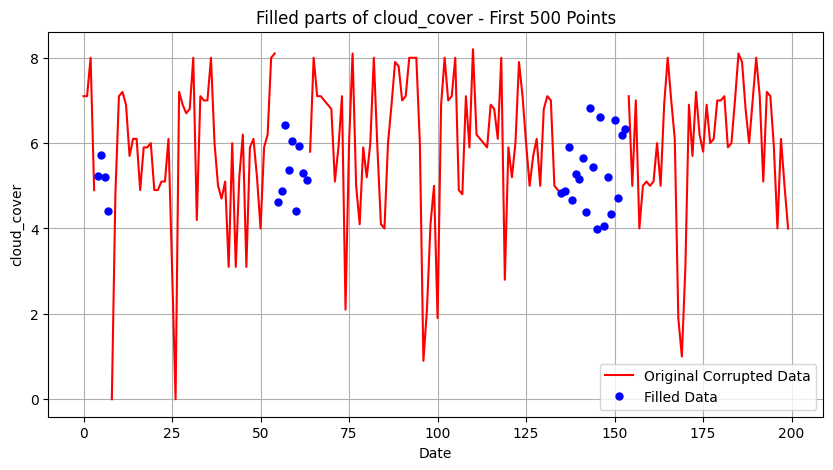

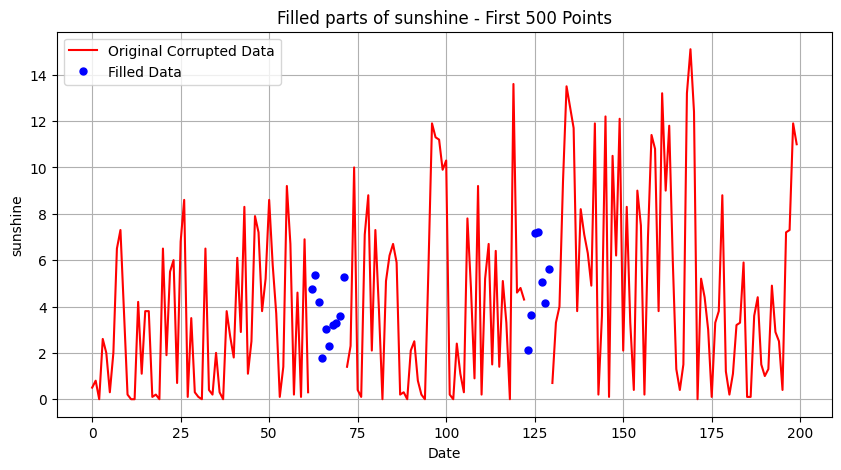

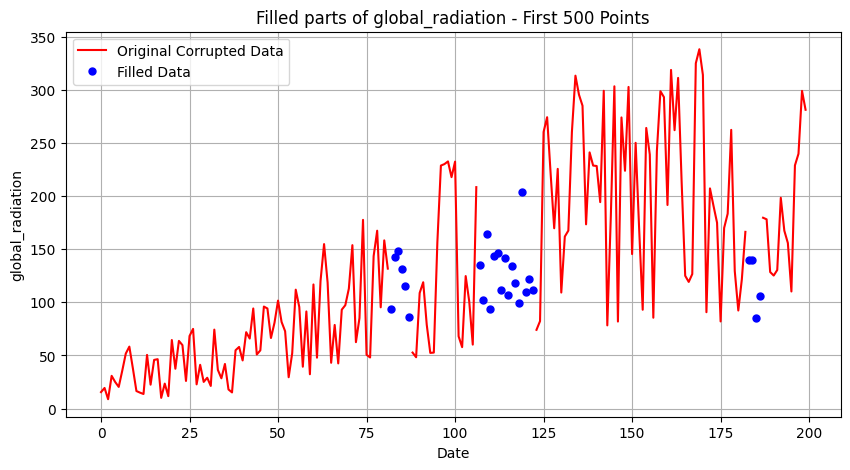

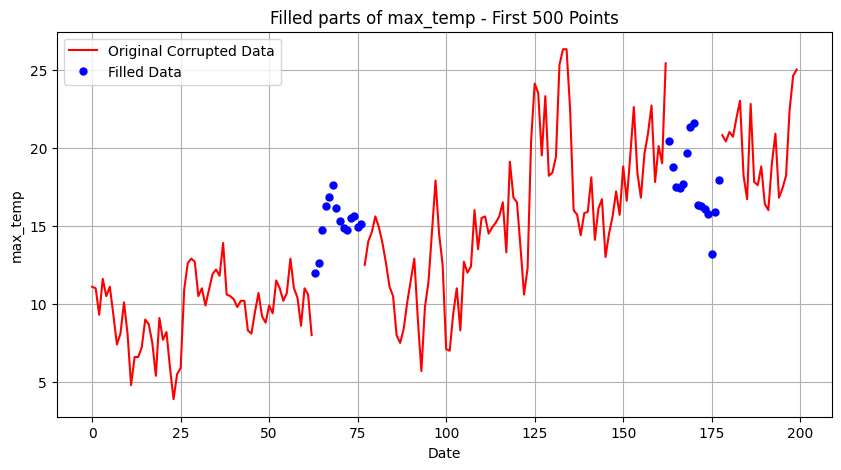

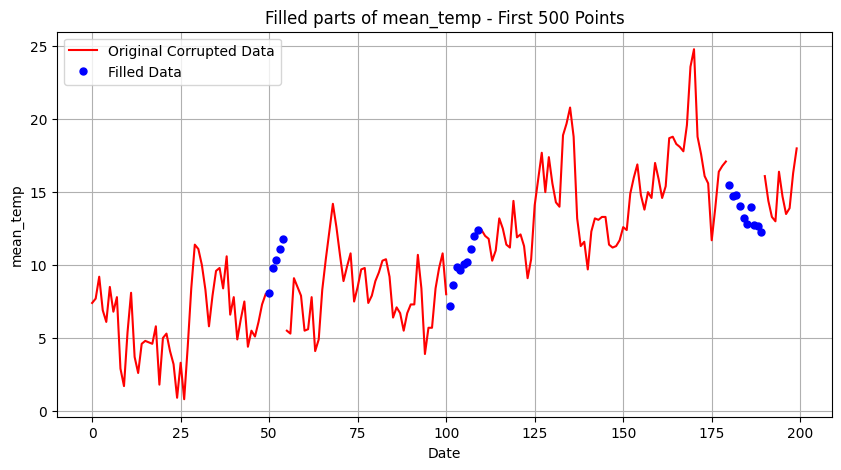

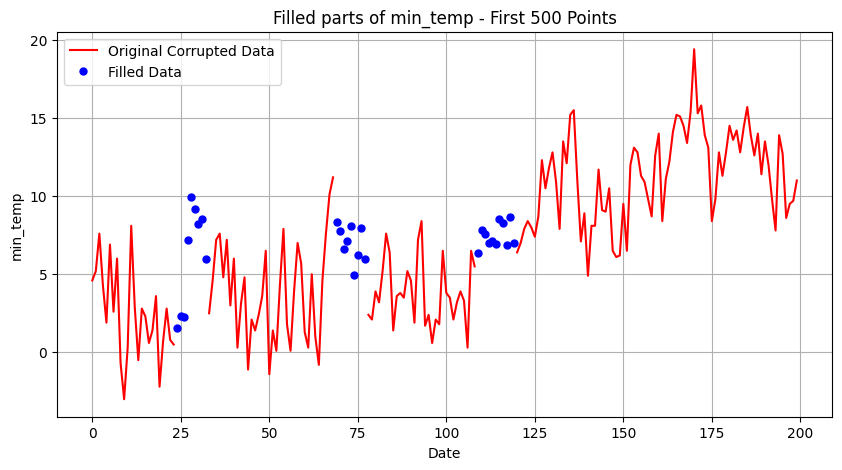

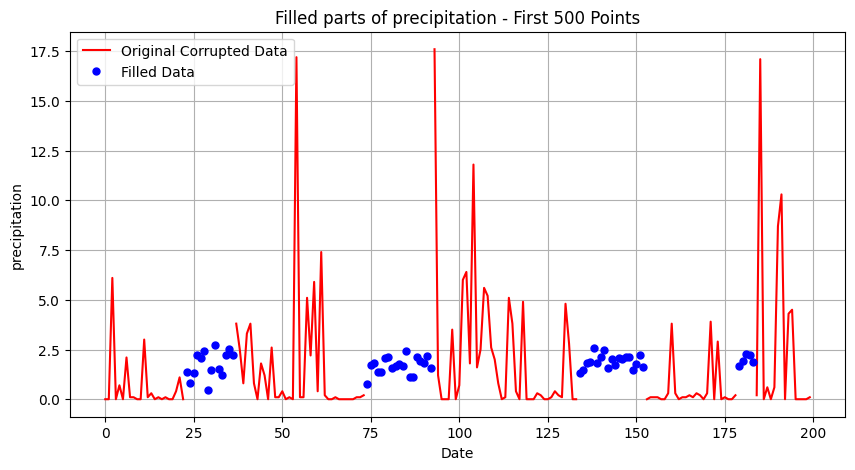

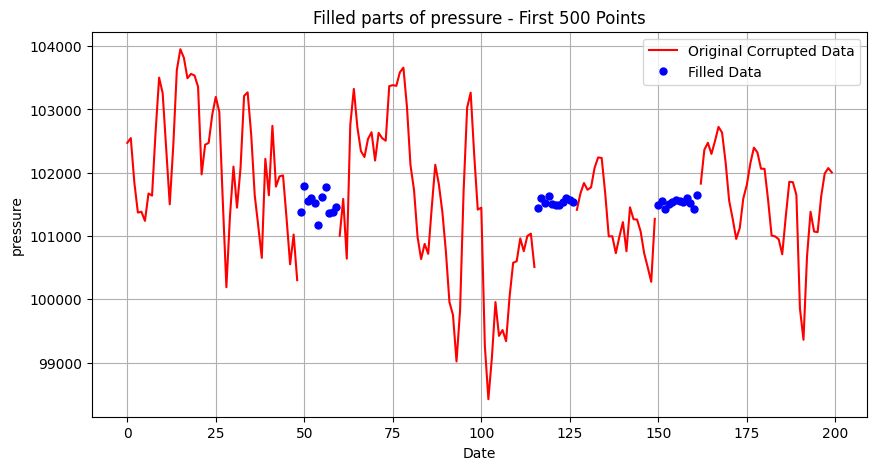

In [ ]:
import matplotlib.pyplot as plt

# 绘制每个变量的比较图，只展示填补部分的前五百个数据点
for column in filled_df.columns:
    if column != 'date':  # 排除日期列
        plt.figure(figsize=(10, 5))
        plt.title(f'Filled parts of {column} - First 500 Points')

        # 获取原始数据中NaN值的索引
        nan_indices = test_set[column].isna()

        # 计算需要绘制的索引范围
        indices_to_plot = nan_indices & (test_set.index < 200)  # 仅考虑前500个数据点

         # 绘制原始数据（受损数据）
        plt.plot(test_set['date'][:200], test_set[column][:200], label='Original Corrupted Data', color='red', linestyle='-')
        # 仅绘制原始数据中NaN值所在位置的填补数据，并限制为前500个数据点
        plt.plot(test_set['date'][indices_to_plot], filled_df[column][indices_to_plot], 'o', label='Filled Data', color='blue', markersize=5)

        # 添加图例
        plt.legend()

        # 设置标签
        plt.xlabel('Date')
        plt.ylabel(column)

        # 显示网格
        plt.grid(True)

        # 显示图形
        plt.show()


Epoch 1/5, Train Loss: 0.03133331569453731, Validation Loss: 0.002346574069927268
Epoch 2/5, Train Loss: 0.005347947541754066, Validation Loss: 0.002477251993966621
Epoch 3/5, Train Loss: 0.004613296460043624, Validation Loss: 0.0018850297083352417
Epoch 4/5, Train Loss: 0.0035415250317628794, Validation Loss: 0.0020770975031148046
Epoch 5/5, Train Loss: 0.003372537657917678, Validation Loss: 0.00256447368769457


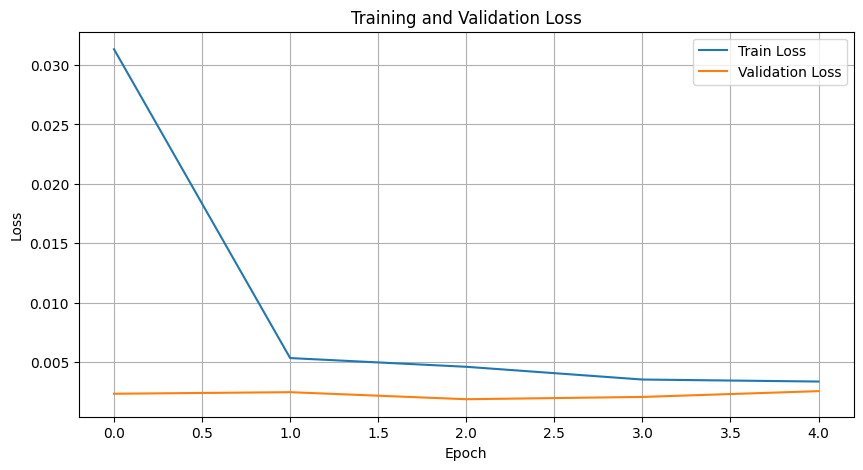

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# 数据准备
# 读取数据并保留 NaN
corrupted_all = pd.concat([df0,df1,df2])
uncorrupted_all = pd.concat([df0_nogaps,df1_nogaps,df2_nogaps])
test_set = pd.read_csv('/content/drive/MyDrive/DL_HW2/test_set.csv')

# 分割数据为训练集和验证集，这里我们假设保留20%的数据作为验证集
train_corrupted_filled, validation_corrupted_filled = train_test_split(corrupted_all, test_size=0.2, random_state=42)

# 暂时填补 NaN（仅用于模型输入）
train_corrupted_filled = train_corrupted_filled.fillna(train_corrupted_filled.mean())
validation_corrupted_filled = validation_corrupted_filled.fillna(validation_corrupted_filled.mean())

# 标准化数据
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_corrupted_filled.drop(columns=['date']))
validation_scaled = scaler.transform(validation_corrupted_filled.drop(columns=['date']))

# 转换为 Tensor
train_tensor = torch.tensor(train_scaled, dtype=torch.float32)
validation_tensor = torch.tensor(validation_scaled, dtype=torch.float32)

# 创建 DataLoader
train_dataset = TensorDataset(train_tensor, train_tensor)
validation_dataset = TensorDataset(validation_tensor, validation_tensor)
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=1, shuffle=False)

# 定义 LSTM 模型架构
class FillMissingValuesLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(FillMissingValuesLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, input_size)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        out = self.fc(lstm_out)
        return out

# 初始化 LSTM 模型
hidden_size = 128
num_layers = 2
input_size = train_tensor.shape[1]
model = FillMissingValuesLSTM(input_size, hidden_size, num_layers)

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练模型和验证模型
epochs = 5
train_losses = []
validation_losses = []

for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    for data, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_losses.append(train_loss / len(train_loader))

    model.eval()
    validation_loss = 0.0
    with torch.no_grad():
        for data, targets in validation_loader:
            outputs = model(data)
            loss = criterion(outputs, targets)
            validation_loss += loss.item()
    validation_losses.append(validation_loss / len(validation_loader))

    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]}, Validation Loss: {validation_losses[-1]}')

# 绘制训练和验证的损失
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()
